# 1.

### A.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [117]:
df = pd.read_csv('/Users/Jonat/Downloads/medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


### B,

In [118]:
X = df.drop('charges', axis = 1)

X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast
2768,21,female,34.600,0,no,southwest
2769,19,male,26.030,1,yes,northwest
2770,23,male,18.715,0,no,northwest


In [119]:
y = df['charges']

y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

# 2

### A.

In [120]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [121]:
X = pd.get_dummies(X, drop_first=True) 
X = X.astype(float)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2767,47.0,45.320,1.0,0.0,0.0,0.0,1.0,0.0
2768,21.0,34.600,0.0,0.0,0.0,0.0,0.0,1.0
2769,19.0,26.030,1.0,1.0,1.0,1.0,0.0,0.0
2770,23.0,18.715,0.0,1.0,0.0,1.0,0.0,0.0


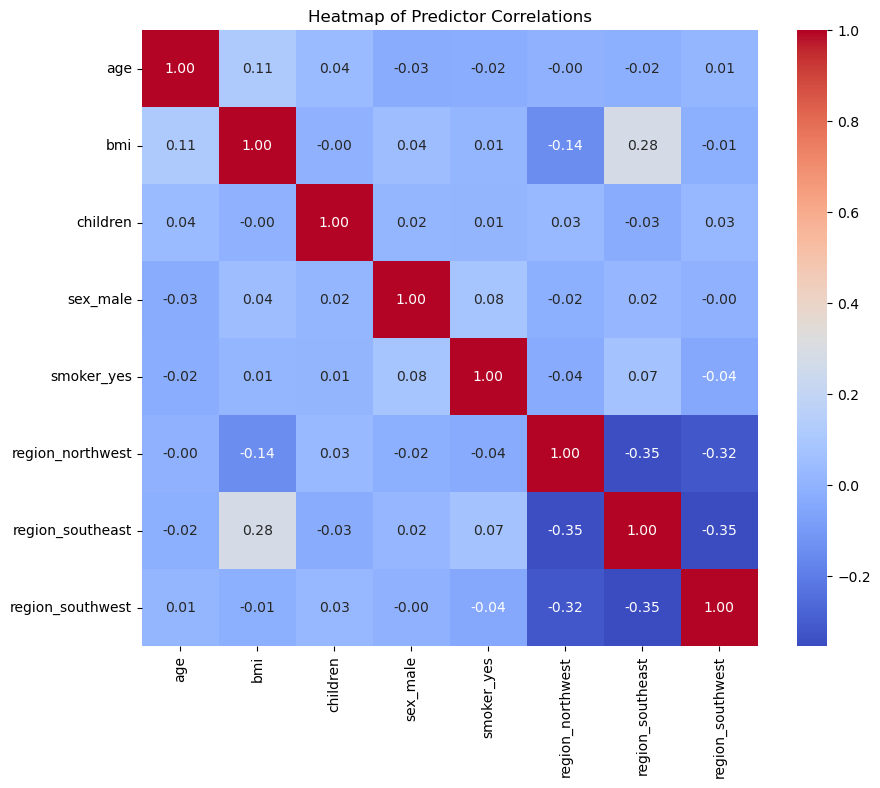

In [122]:
corr = X.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap of Predictor Correlations')
plt.show()


# 3.

### A.

In [123]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [124]:
import statsmodels.api as sm


X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [100]:
#Fitting the Model
lm1 = sm.OLS(y_train, X_train).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     738.5
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:09:12   Log-Likelihood:                -19614.
No. Observations:                1940   AIC:                         3.925e+04
Df Residuals:                    1931   BIC:                         3.930e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.149e+04    809.167  

# 4.

### A.

Under the section for coefficients, the model displays how the medical insurance would fluctuate if the all values were constant or zero


### B.

The R-squared score and adjusted R-squared score is high which means that the model fits well

# 5.






In [102]:

y_pred = lm1.predict(X_test)

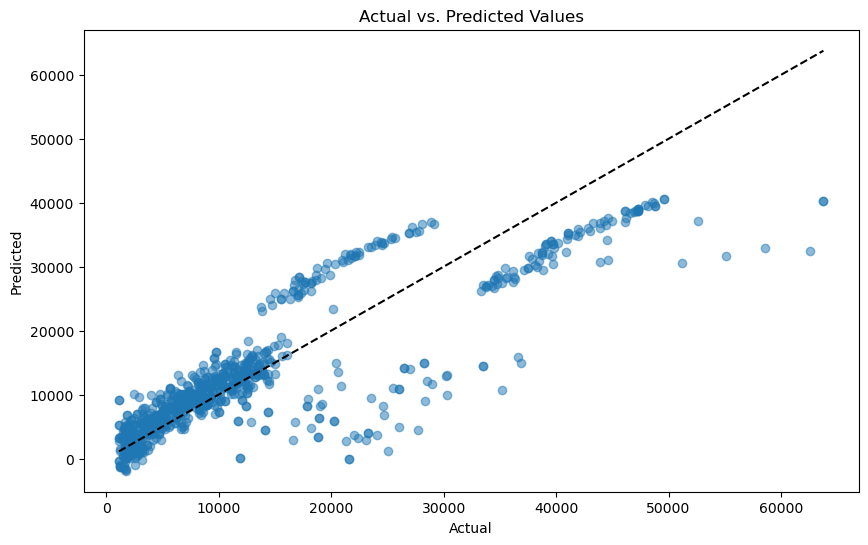

In [103]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

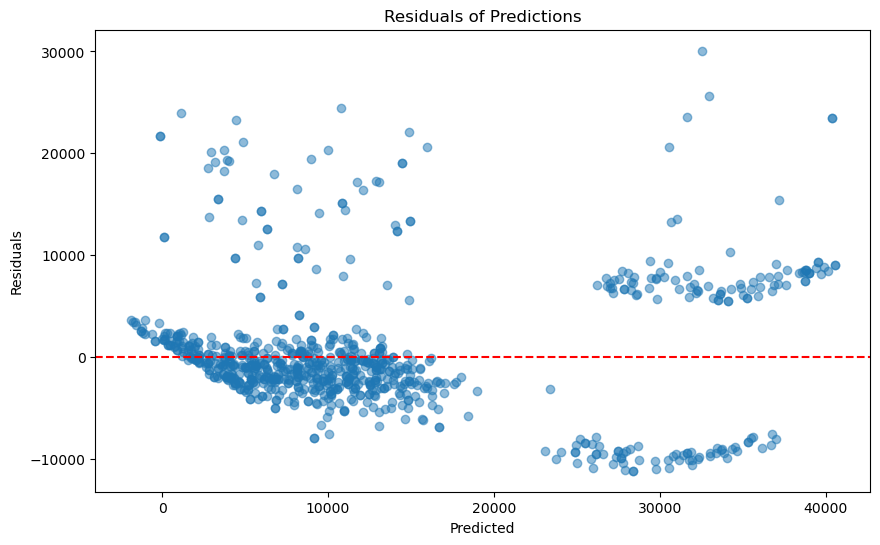

In [104]:


residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at y=0
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 40004195.94237873
Root Mean Squared Error (RMSE): 6324.88703000921
Mean Absolute Error (MAE): 4224.767553044492
R-squared (R²): 0.7443308125692929


# 6.

In [110]:

const = -11490
coef_age = 257.6207
coef_bmi = 320.3245
coef_children = 508.7721
coef_sex_male = -34.7859  
coef_smoker_yes = 23720
coef_region_northwest = -510.4491
coef_region_southeast = -990.5984
coef_region_southwest = -1008.9167




In [111]:
age = 30
bmi = 28.5
children = 2
sex_male = 0  
smoker_yes = 0  
region_northwest = 0
region_southeast = 1  
region_southwest = 0

predicted_charges = (const + coef_age * age + coef_bmi * bmi + coef_children * children + coef_sex_male * sex_male + coef_smoker_yes * smoker_yes +coef_region_northwest * region_northwest +coef_region_southeast * region_southeast + coef_region_southwest * region_southwest)

print(f"Predicted Insurance Charge: ${predicted_charges:.2f}")


Predicted Insurance Charge: $5394.82


# 7.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


y = df['charges']
X = df.drop(['charges', 'sex'], axis=1)  


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [113]:
model_updated = LinearRegression()
model_updated.fit(X_train, y_train)


LinearRegression()

In [115]:
y_pred = model_updated.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 40004195.94237872
R-squared: 0.7443308125692929


# 8.

* ####  The scores are the same which means that the second way it was done was much easier and also got the same result. It also showed that there was no difference once sex was removed from the model.